In [1]:
n <- 200
a <- 2
b <- 3
epsilon <- rnorm(n, 0, 1)

# Часть 1

$$y_{i} = a + b\,x_{i} ​+ ε_{i}​, \quad ε_{i}​ ∼ N(0,σ^2),\quad i=\overline{1,n}$$


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0882 -0.7000 -0.0374  0.6602  3.2237 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.05465    0.07208    28.5   <2e-16 ***
x            3.01079    0.09068    33.2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.019 on 198 degrees of freedom
Multiple R-squared:  0.8477,	Adjusted R-squared:  0.847 
F-statistic:  1102 on 1 and 198 DF,  p-value: < 2.2e-16


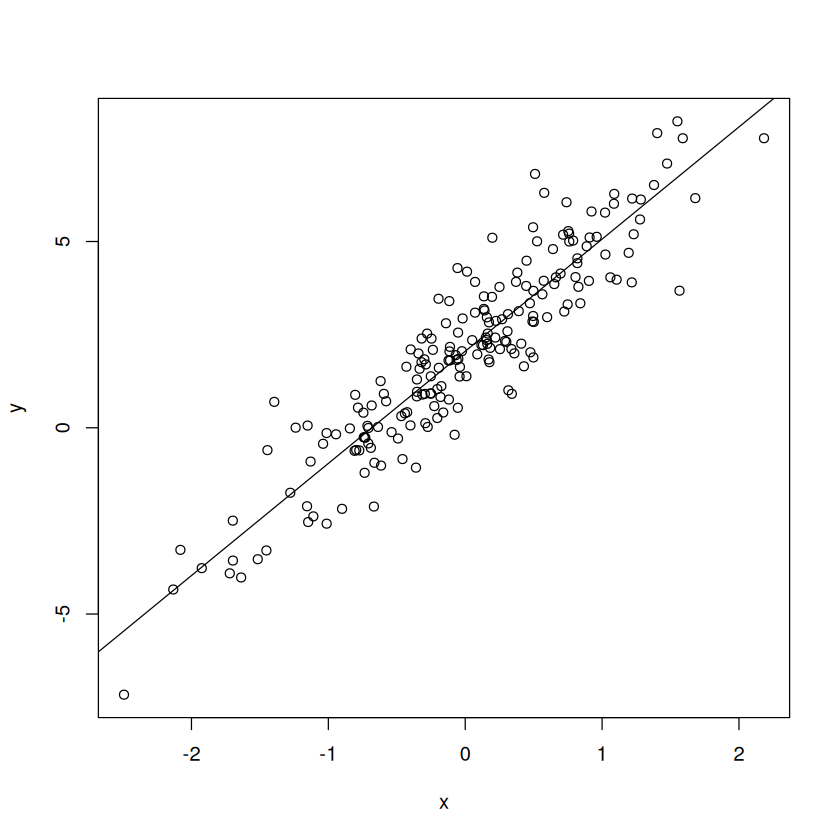

In [2]:
x <- rnorm(n, 0, .8)
y <- a + b * x + epsilon
plot(y~x)
summary(lm(y ~ x))
abline(lm(y ~ x))


Для случая `парной линейной регрессии`
$${\displaystyle {\hat {b}}={\frac {\sum _{t=1}^{n}x_{t}y_{t}}{\sum _{t=1}^{n}x_{t}^{2}}}}$$
$$ \hat{a} = \overline{y} + \hat{b}\,\overline{x} $$

In [3]:
b_est <- sum(x,y)/sum(x^2)
a_est <- mean(y) - b_est*mean(x)
a_est
b_est
y_est <- a_est+b_est*x

[1] 2.056803

[1] 3.159654

Коэффент детерминации <br>
$ R^{2} = 1 - \,\frac{RSS}{TSS} $ <br>
$ RSS = \sum{(y_{i}-\hat{y}_{i})^{2}}$ <br>
$ TSS = \sum{(y_{i}-\overline{y}_{i})^{2}}$

In [4]:
RSS <- sum((y-y_est)^2)
TSS <- sum((y-mean(y))^2)
R_2 <- 1- RSS/TSS
RSS
TSS
R_2

[1] 208.4965

[1] 1350.957

[1] 0.8456675

Гипотеза о о адкветности модели
$$ F = \frac{R^2}{1-R^2}\,(n-2)$$

In [5]:
F <- (R_2/(1-R_2))*(n-2)
F
qf(1 - .05, 1, n-2) #Крит значение статистики

[1] 1084.945

[1] 3.888853

Среднеквадратическая ошибка 
$$ S^2 = \frac{1}{n-2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
Стандартная ошибка оценки 
$$ S = \sqrt{S^2}$$
Оценка дисперсии коэффициента наклона:
$$S^2_{b} = \frac{S^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$
Стандартная ошибка оценки коэффициента наклона SbSb​:
$$S_{b} = \sqrt{S^2_{b}}$$
Оценка дисперсии коэффициента сдвига
$$S^2_{a} = S^2 \cdot \frac{\bar{x}^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$
Стандартная ошибка оценки коэффициента сдвига
$$S_{a} = \sqrt{S^2_{a}}$$
t-статистика для коэффициента сдвига и наклона:
$$t = \frac{\text{оцененное значение коэффициента}}{\text{стандартная ошибка оценки коэффициента}}$$

In [6]:
S2 <- sum((y - y_est)^2) / (n - 2)
SE <- sqrt(S2)
S2_b <- S2 / sum((x - mean(x))^2)
SE_b <- sqrt(S2_b)
S2_a <- S2 * (mean(x^2)) / sum((x - mean(x))^2)
SE_a <- sqrt(S2_a)
t_value_a <- a_est / SE_a
t_value_b <- b_est / SE_b
t_value_a
t_value_b
qt(1 - .05/2, df = n - 2) #квантиль t распределения

[1] 28.34124

[1] 34.60946

[1] 1.972017

# Часть 2

$$y_{i} = a\,x_{i}^{b}\,ε_{i}​, \quad ln(ε_{i})​ ∼ N(0,σ^2),\quad i=\overline{1,n}$$

In [7]:
epsilon <- rlnorm(n, 0, .8)
i <- 1:n

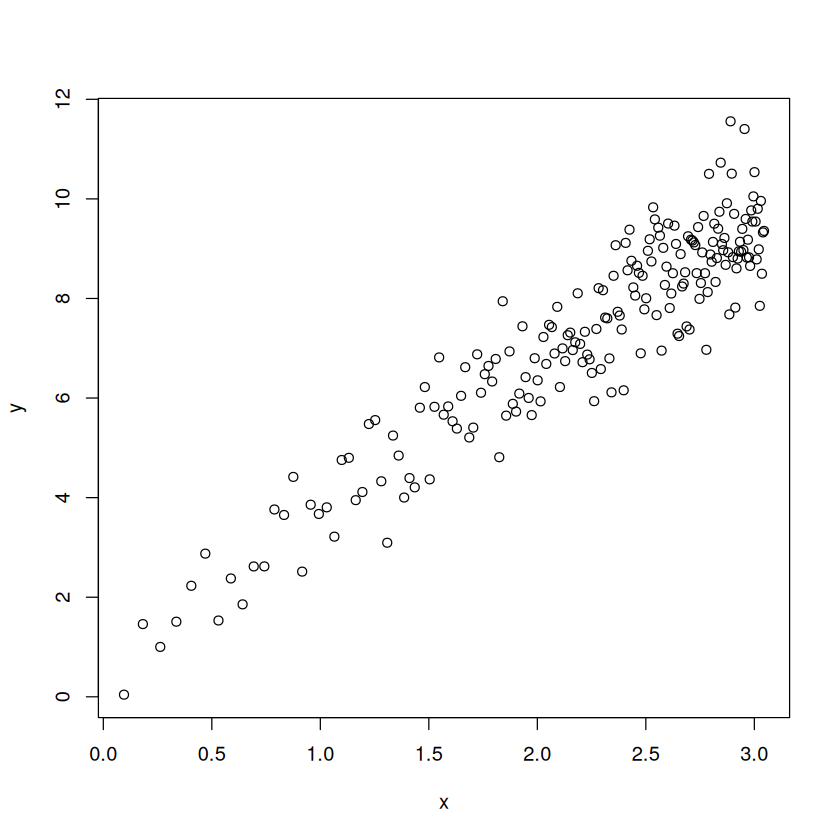

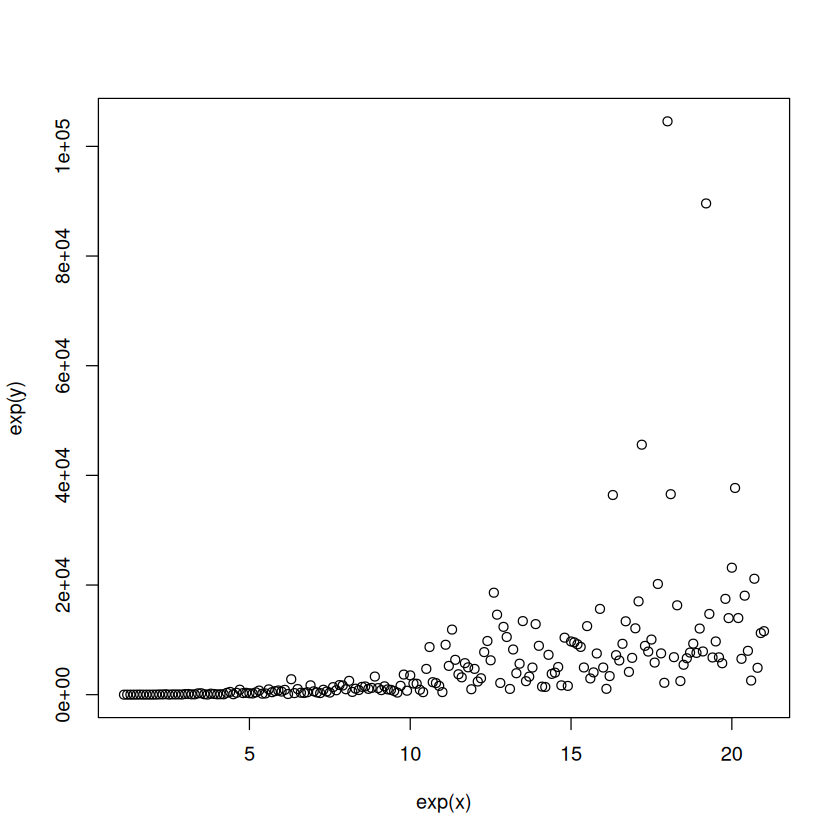

In [8]:
x <- 1+0.1*i
y <- a*(x^b)*epsilon
x <-log(x)
y <-log(y)
plot(y~x)
plot(exp(y)~exp(x))


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.95240 -0.53787 -0.01968  0.56579  2.31330 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.87858    0.17975   4.888  2.1e-06 ***
x            2.89434    0.07762  37.287  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7787 on 198 degrees of freedom
Multiple R-squared:  0.8753,	Adjusted R-squared:  0.8747 
F-statistic:  1390 on 1 and 198 DF,  p-value: < 2.2e-16


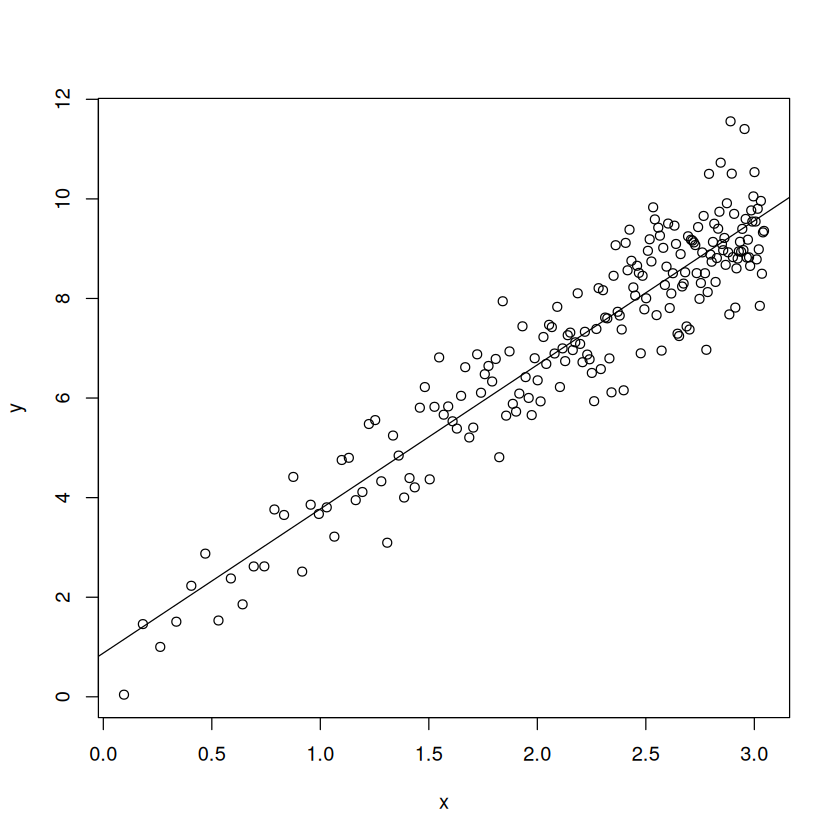

In [9]:
plot(y~x)
reg <- lm(y~x)
summary(reg)
abline(reg)

`summary(reg)` выведет значения для линейной модели. Необходимо `exp(Коэффиценты)` 

In [29]:
exp(reg$coefficients[1])

In [11]:
b_est <- sum(x,y)/sum(x^2)
a_est <- mean(y) - b_est*mean(x)
a_est
b_est

[1] 3.368602

[1] 1.764733

In [12]:
y_est <- a_est+b_est*x
RSS <- sum((y-y_est)^2)
TSS <- sum((y-mean(y))^2)
R_2 <- 1- RSS/TSS
RSS
TSS
R_2

[1] 248.5026

[1] 963.2142

[1] 0.7420069

In [13]:
F <- (R_2/(1-R_2))*(n-2)
F
qf(1 - .05, 1, n-2) #Крит значение статистики

[1] 569.4625

[1] 3.888853

In [14]:
S2 <- sum((y - y_est)^2) / (n - 2)
SE <- sqrt(S2)
S2_b <- S2 / sum((x - mean(x))^2)
SE_b <- sqrt(S2_b)
S2_a <- S2 * (mean(x^2)) / sum((x - mean(x))^2)
SE_a <- sqrt(S2_a)
t_value_a <- a_est / SE_a
t_value_b <- b_est / SE_b
t_value_a
t_value_b
qt(1 - .05/2, df = n - 2) #квантиль t распределения

[1] 13.02694

[1] 15.80322

[1] 1.972017

# Часть 3

$$y_{i} = a\,e^{b\,x_{i}}\,ε_{i}​, \quad ln(ε_{i})​ ∼ N(0,σ^2),\quad i=\overline{1,n}$$

In [15]:
epsilon <- rlnorm(n, 0, .8)
i <- 1:n

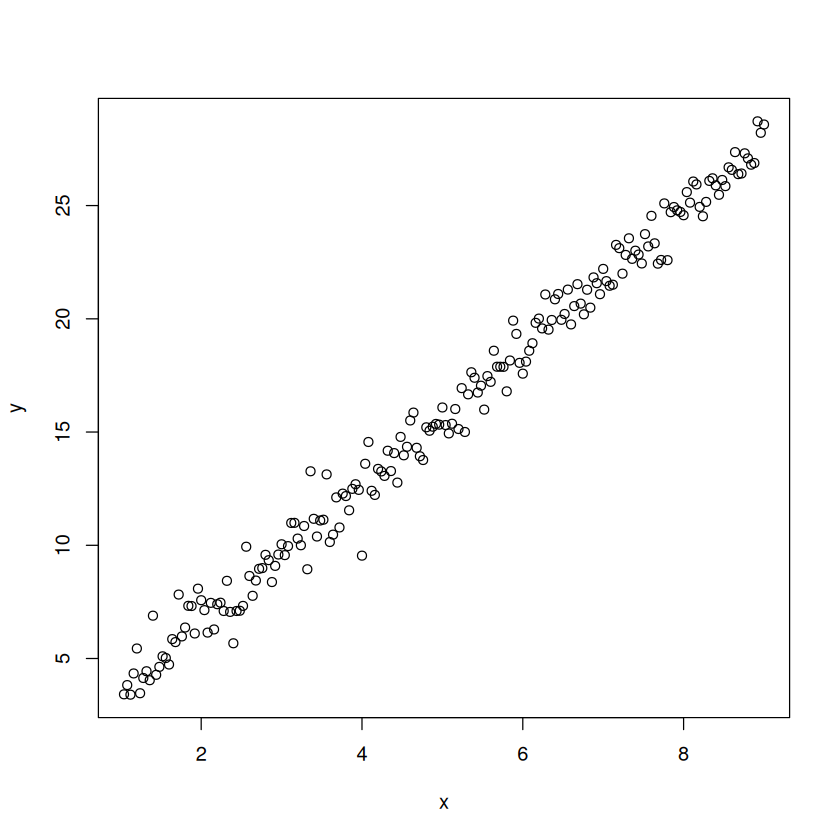

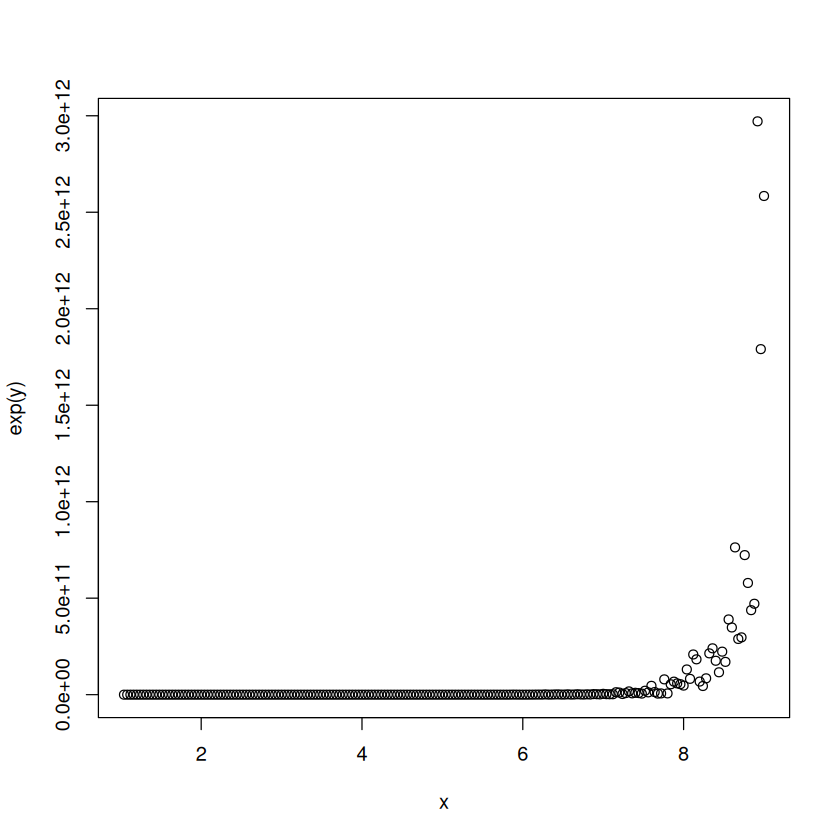

In [16]:
x <- 1 + .04 * i
y <- a * exp(b * x) * epsilon

y <- log(y)

plot(y ~ x)
plot(exp(y) ~ x)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.11833 -0.48369 -0.06083  0.44296  2.54066 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.57340    0.13346   4.297 2.72e-05 ***
x            3.02174    0.02415 125.114  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7888 on 198 degrees of freedom
Multiple R-squared:  0.9875,	Adjusted R-squared:  0.9874 
F-statistic: 1.565e+04 on 1 and 198 DF,  p-value: < 2.2e-16


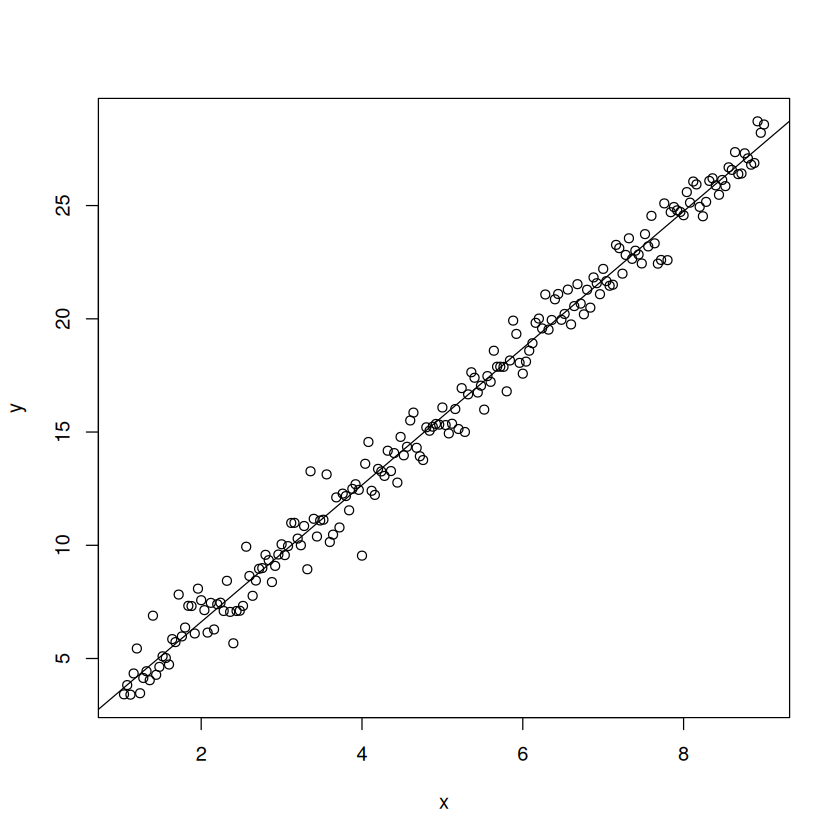

In [17]:
plot(y~x)
reg <- lm(y~x)
summary(reg)
abline(reg)

`summary(reg)` выведет значения для линейной модели. Необходимо `exp(Коэффиценты)` 

In [18]:
exp(reg$coefficients[1])

(Intercept) 
   1.774295

In [19]:
b_est <- sum(x,y)/sum(x^2)
a_est <- mean(y) - b_est*mean(x)
a_est
b_est

[1] 12.32897

[1] 0.6799892

In [20]:
y_est <- a_est+b_est*x
RSS <- sum((y-y_est)^2)
TSS <- sum((y-mean(y))^2)
R_2 <- 1- RSS/TSS
RSS
TSS
R_2

[1] 5972.409

[1] 9862.563

[1] 0.3944364

In [21]:
F <- (R_2/(1-R_2))*(n-2)
F
qf(1 - .05, 1, n-2) #Крит значение статистики

[1] 128.9681

[1] 3.888853

In [22]:
S2 <- sum((y - y_est)^2) / (n - 2)
SE <- sqrt(S2)
S2_b <- S2 / sum((x - mean(x))^2)
SE_b <- sqrt(S2_b)
S2_a <- S2 * (mean(x^2)) / sum((x - mean(x))^2)
SE_a <- sqrt(S2_a)
t_value_a <- a_est / SE_a
t_value_b <- b_est / SE_b
t_value_a
t_value_b
qt(1 - .05/2, df = n - 2) #квантиль t распределения

[1] 13.26797

[1] 4.043605

[1] 1.972017

# Часть 4

$$y_{i} = a+\,b\,ln(x_{i})\,+\,ε_{i}​, \quad ε_{i} ∼ N(0,σ^2),\quad i=\overline{1,n}$$

In [23]:
epsilon <- rnorm(n, 0, .8)
i <- 1:n

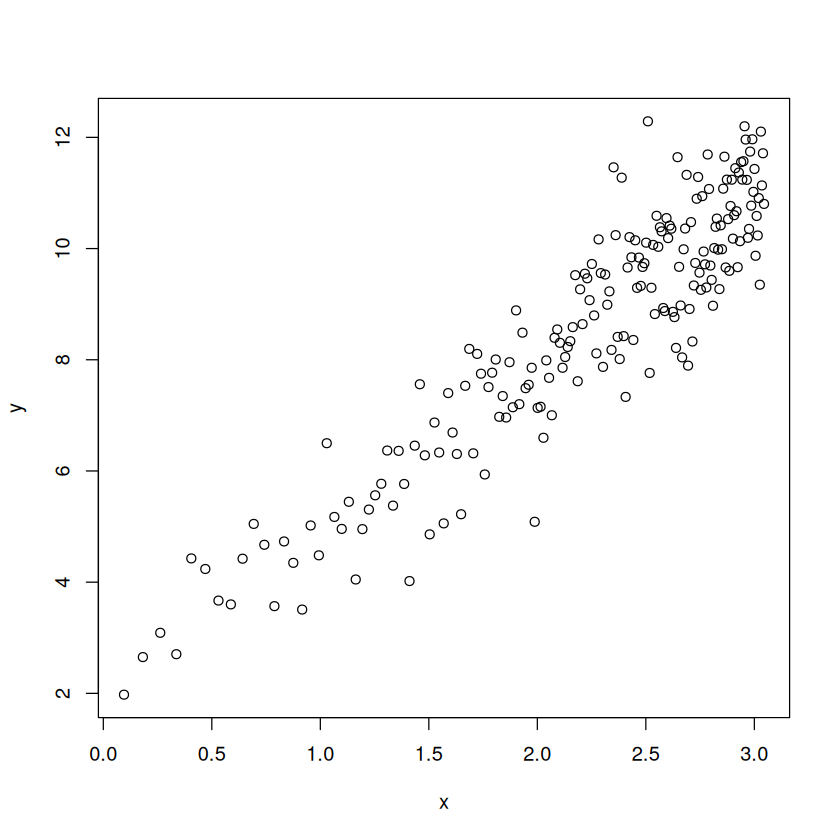

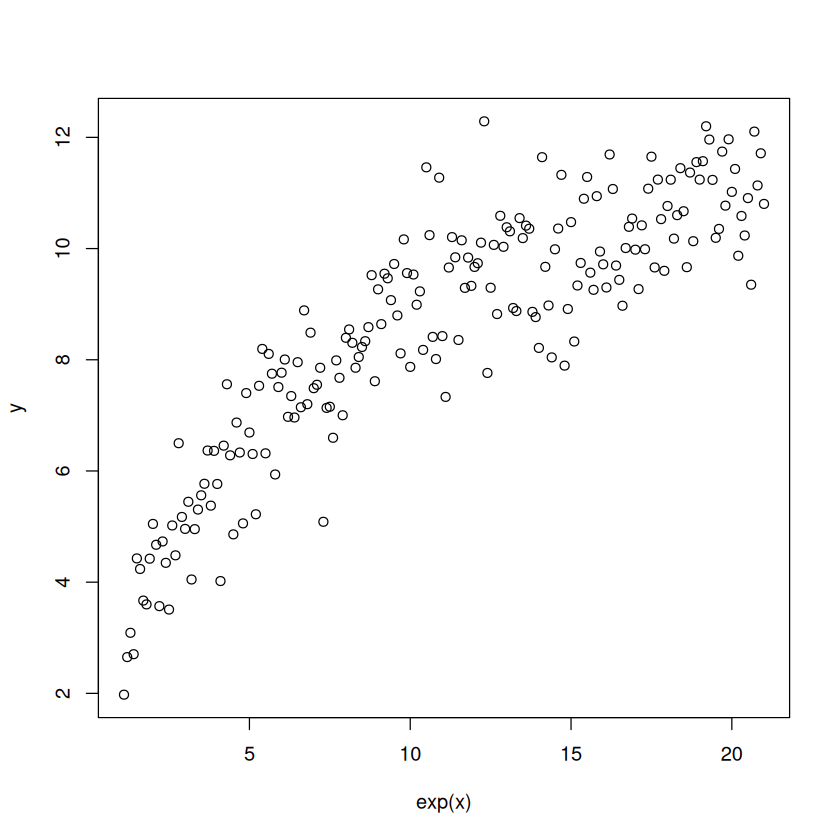

In [24]:
x <- 1 + .1 * i
y <- a + b*log(x) + epsilon
x <- log(x)

plot(y ~ x)
plot(y ~ exp(x))


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.80068 -0.58670  0.00603  0.63984  2.84017 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.93857    0.20491    9.46   <2e-16 ***
x            2.99227    0.08849   33.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8878 on 198 degrees of freedom
Multiple R-squared:  0.8524,	Adjusted R-squared:  0.8517 
F-statistic:  1143 on 1 and 198 DF,  p-value: < 2.2e-16


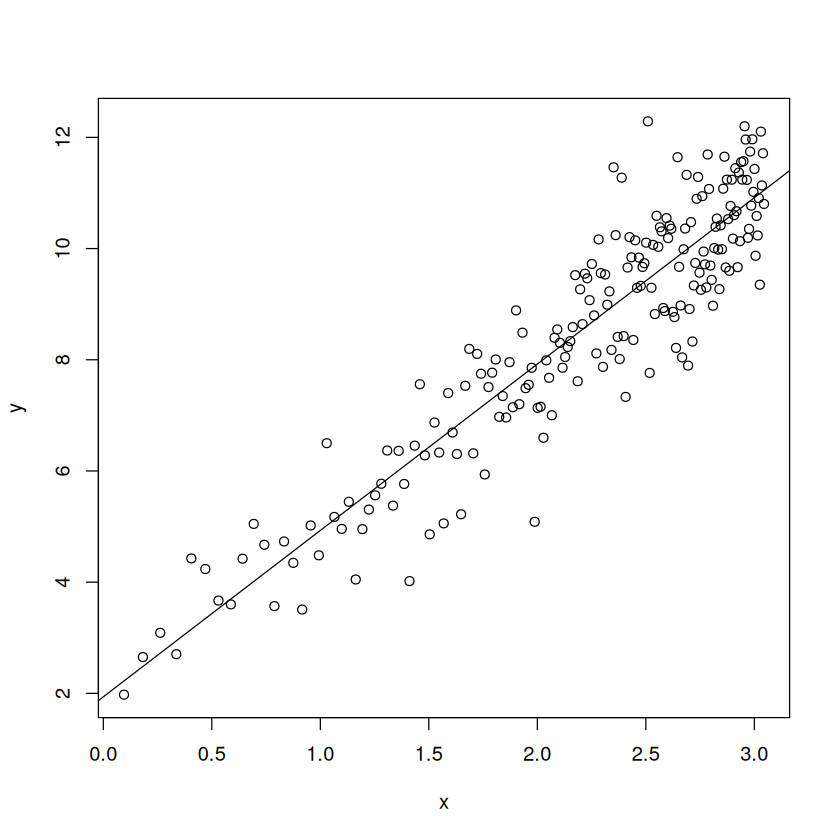

In [25]:
plot(y~x)
reg <- lm(y~x)
summary(reg)
abline(reg)

# Часть 5

$$y_{i} = a+\, \frac{b}{x_{i}}\,+\,ε_{i}​, \quad ε_{i} ∼ N(0,σ^2),\quad i=\overline{1,n}$$

In [26]:
a <- .8
b <- 20

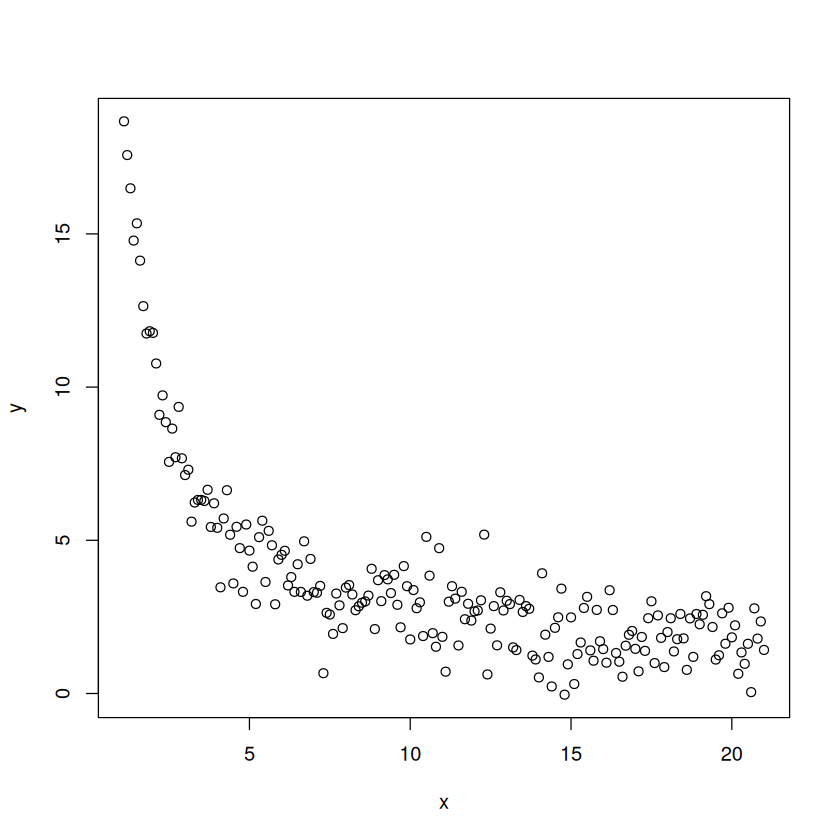

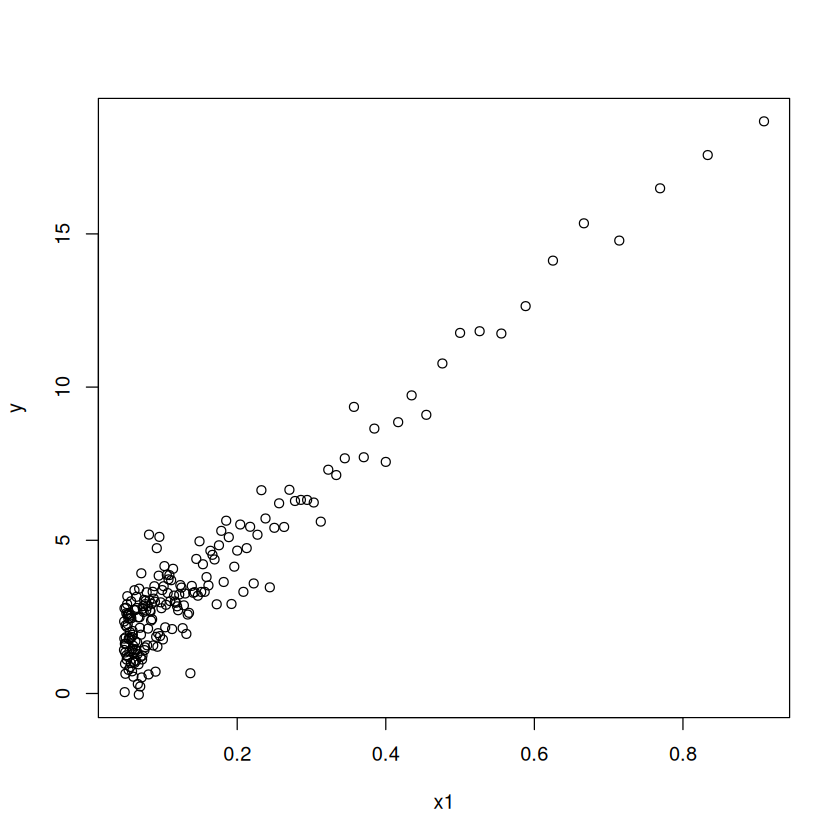

In [27]:
x <- 1 + .1 * i

y <- a + b/x + epsilon

x1 <- 1/x
# Использую новую перменную,не полчается переопределить изначальную. 
# Из за формата хранения числа в компьютере?
plot(y ~ x)
plot(y ~ x1)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.79642 -0.57942  0.01524  0.65014  2.85158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.69145    0.08846   7.817 3.13e-13 ***
x1          20.20074    0.41603  48.556  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8873 on 198 degrees of freedom
Multiple R-squared:  0.9225,	Adjusted R-squared:  0.9221 
F-statistic:  2358 on 1 and 198 DF,  p-value: < 2.2e-16


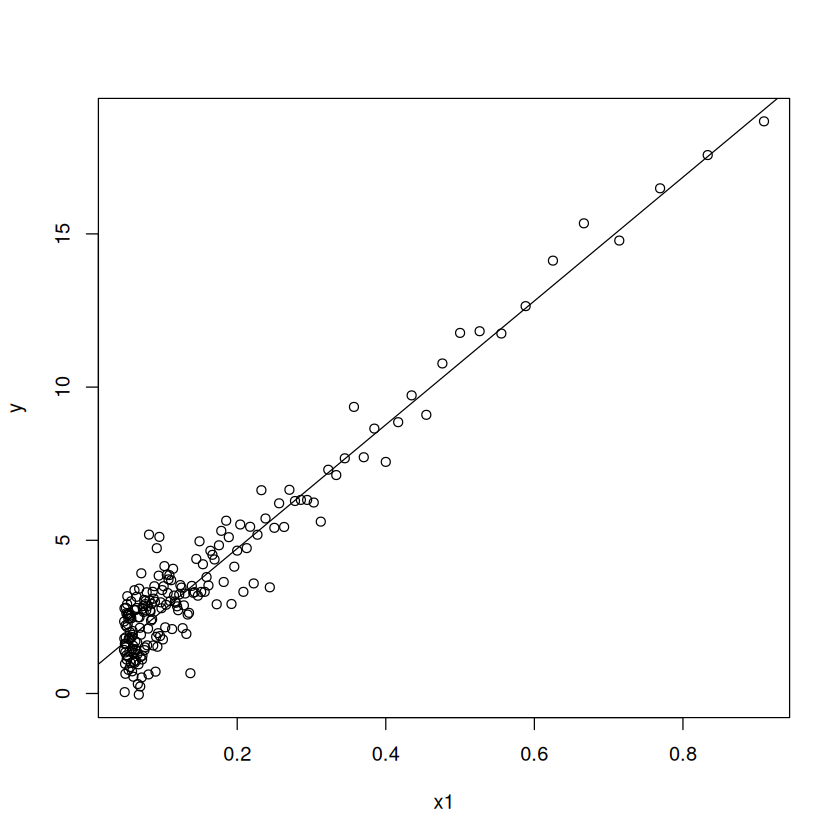

In [28]:
plot(y~x1)
reg <- lm(y~x1)
summary(reg)
abline(reg)